In [1]:
# Importando as bibliotecas pandas, seaborn e matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Etapa 01) Análise exploratória dos dados (DataUnderstanding)
#Lendo a base de dados


streaming = pd.read_csv("/content/streaming_data.csv")
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [3]:
# Exibindo informações sobre o DataFrame 'streaming'
# Utilizando o método info() para fornecer uma visão geral sobre o número de entradas não nulas, tipos de dados, e uso de memória
streaming.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [4]:
# Gerando estatísticas descritivas para o DataFrame 'streaming'
# Utilizando o método describe(), que calcula várias estatísticas, como média, desvio padrão, mínimo, máximo, quartis, etc.
streaming.describe()


,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [5]:
# Contando o número total de entradas em cada coluna do DataFrame 'streaming' que são nulas (NaN)
# Utilizando o método isna() para identificar valores ausentes e o método count() para contar as entradas não nulas em cada coluna
streaming.isna().count()


Age                       77884
Gender                    77884
Time_on_platform          77884
Devices_connected         77884
Subscription_type         77884
Num_streaming_services    77884
Num_active_profiles       77884
Avg_rating                77884
Churned                   77884
User_id                   77884
dtype: int64

In [6]:
# Exibindo os tipos de dados de cada coluna no DataFrame 'streaming'
streaming.dtypes


Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [7]:
# Agregando o número de usuários por categoria de 'Churned' no DataFrame 'streaming'
# Utilizando o método groupby para agrupar por 'Churned', contando o número de entradas (usuários) em cada categoria com 'User_id'
# Resetando o índice para obter um DataFrame resultante com índice numérico
churn_agg = streaming.groupby("Churned")["User_id"].count().reset_index()
churn_agg


,Churned,User_id
0,0.0,46285
1,1.0,14863


<Axes: xlabel='Churned', ylabel='User_id'>

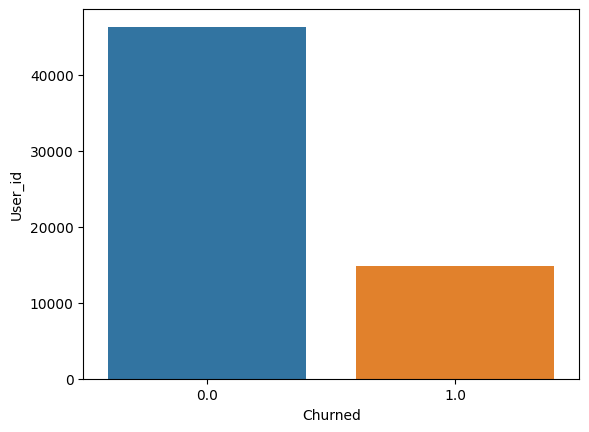

In [8]:
# Criando um gráfico de barras usando seaborn para visualizar a contagem de usuários por categoria de 'Churned'
# Utilizando o método barplot() e especificando o DataFrame 'churn_agg' como os dados
# Configurando o eixo x com 'Churned', o eixo y com 'User_id'
sns.barplot(data=churn_agg, x="Churned", y="User_id")


In [9]:
# Agregando o número de usuários por categoria de 'Gender' no DataFrame 'streaming'
# Utilizando o método groupby para agrupar por 'Gender', contando o número de entradas (usuários) em cada categoria com 'User_id'
# Resetando o índice para obter um DataFrame resultante com índice numérico
clients_gender = streaming.groupby("Gender")["User_id"].count().reset_index()

# Criando um novo DataFrame 'clients_gender' com os resultados da agregação
clients_gender = pd.DataFrame(clients_gender)
clients_gender


,Gender,User_id
0,Female,31572
1,Male,31796


In [10]:
# Etapa 02) Tratamento dos Dados (Data Preparation)

streaming_nan = ["Time_on_platform", "Num_streaming_services", "Churned", "Avg_rating", "Devices_connected"]
streaming[streaming_nan] = streaming[streaming_nan].fillna(0)

In [11]:
# Removendo linhas com valores ausentes nas colunas especificadas do DataFrame 'streaming'
# Utilizando o método dropna() com a opção inplace=True para modificar o DataFrame original
streaming_na = ["Gender", "Subscription_type", "Age"]
streaming.dropna(subset=streaming_na, inplace=True)


In [12]:
# Mapeando os valores da coluna 'Churned' para 'No' e 'Yes' no DataFrame 'streaming'
# Utilizando o método map() para substituir os valores 0 por 'No' e 1 por 'Yes'
streaming["Churned"] = streaming["Churned"].map({0: 'No', 1: 'Yes'})

# Criando uma cópia do DataFrame 'streaming' chamada 'streaming_transformed'
streaming_transformed = streaming.copy()

# Mapeando os valores da coluna 'Churned' para 'No' e 'Yes' na cópia 'streaming_transformed'
# Utilizando o método map() para substituir os valores 0 por 'No' e 1 por 'Yes'
streaming_transformed["Churned"] = streaming_transformed["Churned"].map({0: 'No', 1: 'Yes'})


In [13]:
# Exibindo a coluna 'Churned' do DataFrame 'streaming'
print(streaming["Churned"])


0         No
1         No
2        Yes
3         No
5         No
        ... 
77879     No
77880     No
77881    Yes
77882     No
77883     No
Name: Churned, Length: 36515, dtype: object


In [14]:
# Exibindo os tipos de dados de cada coluna no DataFrame 'streaming'
streaming.dtypes


Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [16]:
# Convertendo as colunas 'Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services' e 'Avg_rating' para o tipo de dado inteiro no DataFrame 'streaming'
streaming[["Age", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Avg_rating"]] = streaming[["Age", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Avg_rating"]].astype(int)


In [17]:
# Exibindo os tipos de dados de cada coluna no DataFrame 'streaming' após a conversão
streaming.dtypes


Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                   object
User_id                   object
dtype: object

In [18]:
# Etapa 03) Modelagem dos Dados - Regressão Logística


X = streaming.drop(columns=["User_id" ,"Churned"], axis = 1)

y = streaming[["Churned"]]

In [19]:
# Importando a classe LabelEncoder do scikit-learn
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do LabelEncoder
le = LabelEncoder()

# Ajustando o encoder aos valores únicos da coluna 'Churned' e transformando os valores no DataFrame 'y'
le.fit(y['Churned'])
y['Churned'] = le.transform(y['Churned'])


<ipython-input-19-a2d6164d10b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


In [20]:
# Utilizando o método get_dummies do pandas para realizar a codificação one-hot das variáveis categóricas em X
X = pd.get_dummies(X)


In [21]:
# Importando a classe MinMaxScaler do scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
mm = MinMaxScaler()

# Ajustando e transformando as variáveis em X usando o MinMaxScaler
# Criando um novo DataFrame 'X' com os valores escalados
X = pd.DataFrame(mm.fit_transform(X))


In [22]:
# Importando a função train_test_split do scikit-learn
from sklearn.model_selection import train_test_split

# Dividindo os conjuntos de dados X e y em conjuntos de treinamento e teste
# Utilizando a função train_test_split e especificando a proporção de teste (test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [23]:
# Importando a classe LogisticRegression do scikit-learn
from sklearn.linear_model import LogisticRegression

# Criando uma instância do modelo de regressão logística
model = LogisticRegression()

# Ajustando o modelo aos dados de treinamento (X_train, y_train)
lr = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Realizando previsões no conjunto de teste usando o modelo de regressão logística
predictions = lr.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# Criando um DataFrame que combina as variáveis de entrada do conjunto de teste (X_test), as verdadeiras categorias 'Churned' (y_test) e as previsões do modelo (lr.predict(X_test))
X_test.assign(Churned=y_test).assign(label=lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,Churned,label
2807,0.568627,0.931613,1.0,0.0,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
31106,0.921569,0.953077,0.4,0.0,0.50,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
4052,0.529412,0.648704,0.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
35957,0.725490,0.000000,0.4,1.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
24027,0.156863,0.000000,0.8,0.0,0.50,0.6,0.0,1.0,1.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,0.392157,0.510789,0.0,0.0,0.25,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
10470,0.470588,0.000000,0.4,0.0,0.25,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
2850,0.921569,0.957529,0.0,0.0,0.50,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
26626,0.960784,0.499144,0.0,0.0,0.00,0.4,0.0,1.0,1.0,0.0,0.0,NaN,0


In [ ]:
#Etapa 04) Modelagem dos Dados - Tunning

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format="d")

In [ ]:
# Importando as métricas de avaliação do scikit-learn
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculando e exibindo várias métricas de avaliação para o modelo de regressão logística nos conjuntos de treino e teste
print(f"Acurácia (Treino):{accuracy_score(y_train,lr.predict(X_train))}")
print(f"Acurácia (Teste):{accuracy_score(y_train,lr.predict(X_train))}")

print(f"Acurácia Balanceada (Treino):{balanced_accuracy_score(y_train,lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste):{balanced_accuracy_score(y_train,lr.predict(X_train))}")

print(f"Precisao (Treino):{precision_score(y_train,lr.predict(X_train))}")
print(f"Precisao (Teste):{precision_score(y_train,lr.predict(X_train))}")

print(f"Recall (Treino):{recall_score(y_train,lr.predict(X_train))}")
print(f"Recall (Teste):{recall_score(y_train,lr.predict(X_train))}")

print(f"F1 (Treino):{f1_score(y_train,lr.predict(X_train))}")
print(f"F1 (Teste):{f1_score(y_train,lr.predict(X_train))}")

print(f"Roc Auc Score (Treino):{roc_auc_score(y_train,lr.predict_proba(X_train)[:,1])}")
print(f"Roc Auc Score (Teste):{roc_auc_score(y_train,lr.predict_proba(X_train)[:,1])}")

In [ ]:
# Etapa 05) Modelagem dos Dados - Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

In [ ]:
# Realizando previsões no conjunto de teste usando o modelo de RandomForestClassifier
rf.predict(X_test)

In [ ]:
# Criando um DataFrame que combina as variáveis de entrada do conjunto de teste (X_test), as verdadeiras categorias 'Churned' (y_test) e as previsões do modelo de regressão logística (lr.predict(X_test))
X_test.assign(Churned=y_test).assign(label=lr.predict(X_test))

In [ ]:
# Importando a função plot_confusion_matrix do scikit-learn
from sklearn.metrics import plot_confusion_matrix

# Criando e exibindo a matriz de confusão para o modelo RandomForestClassifier no conjunto de teste
plot_confusion_matrix(rf, X_test, y_test, values_format="d")
plt.show()

In [ ]:
# Avaliando o desempenho do modelo RandomForestClassifier nos conjuntos de treino e teste utilizando diversas métricas de avaliação:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino):{accuracy_score(y_train,rf.predict(X_train))}")
print(f"Acurácia (Teste):{accuracy_score(y_train,rf.predict(X_train))}")

print(f"Acurácia Balanceada (Treino):{balanced_accuracy_score(y_train,rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste):{balanced_accuracy_score(y_train,rf.predict(X_train))}")

print(f"Precisao (Treino):{precision_score(y_train,rf.predict(X_train))}")
print(f"Precisao (Teste):{precision_score(y_train,rf.predict(X_train))}")

print(f"Recall (Treino):{recall_score(y_train,rf.predict(X_train))}")
print(f"Recall (Teste):{recall_score(y_train,rf.predict(X_train))}")

print(f"F1 (Treino):{f1_score(y_train,rf.predict(X_train))}")
print(f"F1 (Teste):{f1_score(y_train,rf.predict(X_train))}")

print(f"Roc Auc Score (Treino):{roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")
print(f"Roc Auc Score (Teste):{roc_auc_score(y_train,rf.predict_proba(X_train)[:,1])}")

In [ ]:
# Realizando uma busca em grade (Grid Search) para encontrar os melhores hiperparâmetros para o modelo RandomForestClassifier:

# Parâmetros a serem testados:
#   - Profundidade máxima da árvore (max_depth) variando de 1 a 10.
#   - Número de estimadores (n_estimators) testando 100, 300 e 500.

# Utilizando GridSearchCV do scikit-learn para explorar combinações desses parâmetros.
# A métrica de avaliação utilizada é a acurácia ("accuracy").
# Utilizando validação cruzada com 5 folds (cv=5) para avaliar o desempenho do modelo em diferentes conjuntos de treino/teste.
# O parâmetro n_jobs = -1 indica que o treinamento deve ser paralelizado, utilizando todos os núcleos disponíveis.

from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10],
              "n_estimators": [100,300,500]}

grid_search = GridSearchCV(rf, parameters, scoring = "accuracy", cv=5, n_jobs = -1)

In [ ]:
# Treinando o modelo RandomForestClassifier com todas as combinações de hiperparâmetros usando GridSearchCV:

# Ajustando o modelo aos dados de treino (X_train, y_train).
# O GridSearchCV realizará uma busca exaustiva testando todas as combinações de hiperparâmetros definidas.
# Após o treinamento, o modelo resultante terá os melhores hiperparâmetros encontrados pela busca em grade.
grid_search.fit(X_train, y_train)

In [ ]:
# Obtendo os melhores hiperparâmetros encontrados pela busca em grade para o modelo RandomForestClassifier:

# Utilizando o atributo best_estimator_ do objeto GridSearchCV para acessar o modelo com os melhores parâmetros.
# Em seguida, utilizando get_params() para obter um dicionário com os hiperparâmetros desse modelo.
grid_search.best_estimator_.get_params()


In [ ]:
# Criando uma instância do modelo RandomForestClassifier com hiperparâmetros ajustados manualmente:

rf_tunned = RandomForestClassifier(
 bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 1,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 500,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False
)

In [ ]:
# Treinando o modelo RandomForestClassifier com os melhores hiperparâmetros encontrados:

# Ajustando o modelo aos dados de treino (X_train, y_train) utilizando os hiperparâmetros ajustados manualmente.
# O modelo agora está configurado com os melhores parâmetros obtidos pela busca em grade.
rf_tunned.fit(X_train, y_train)


In [ ]:
# Realizando previsões utilizando o modelo RandomForestClassifier ajustado:

# Gerando previsões para o conjunto de teste (X_test) utilizando o modelo treinado com os melhores hiperparâmetros encontrados.
# As previsões indicarão as classes preditas para cada instância no conjunto de teste.
rf_tunned.predict(X_test)


In [ ]:
# Adicionando previsões ao conjunto de teste para análise:

# Criando um DataFrame que inclui as previsões do modelo LogisticRegression (lr) para a variável alvo (Churned) no conjunto de teste.
# A coluna "label" será adicionada ao DataFrame, contendo as previsões do modelo para as instâncias do conjunto de teste.
X_test.assign(Churned=y_test).assign(label=lr.predict(X_test))


In [ ]:
# Visualizando a matriz de confusão do modelo RandomForestClassifier ajustado:

# Utilizando a função plot_confusion_matrix do scikit-learn para gerar e exibir a matriz de confusão.
# A matriz de confusão mostra a quantidade de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
# Os valores reais (y_test) e as previsões do modelo RandomForestClassifier ajustado (rf_tuned) são utilizados para criar a matriz.
# O parâmetro values_format="d" formata os valores na matriz como inteiros.

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_tunned, X_test, y_test, values_format="d")

In [ ]:
# Avaliando o desempenho do modelo RandomForestClassifier ajustado nos conjuntos de treino e teste utilizando diversas métricas de avaliação:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino):{accuracy_score(y_train,rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste):{accuracy_score(y_train,rf_tunned.predict(X_train))}")

print(f"Acurácia Balanceada (Treino):{balanced_accuracy_score(y_train,rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste):{balanced_accuracy_score(y_train,rf_tunned.predict(X_train))}")

print(f"Precisao (Treino):{precision_score(y_train,rf_tunned.predict(X_train))}")
print(f"Precisao (Teste):{precision_score(y_train,rf_tunned.predict(X_train))}")

print(f"Recall (Treino):{recall_score(y_train,rf_tunned.predict(X_train))}")
print(f"Recall (Teste):{recall_score(y_train,rf_tunned.predict(X_train))}")

print(f"F1 (Treino):{f1_score(y_train,rf_tunned.predict(X_train))}")
print(f"F1 (Teste):{f1_score(y_train,rf_tunned.predict(X_train))}")

print(f"Roc Auc Score (Treino):{roc_auc_score(y_train,rf_tunned.predict_proba(X_train)[:,1])}")
print(f"Roc Auc Score (Teste):{roc_auc_score(y_train,rf_tunned.predict_proba(X_train)[:,1])}")